In [ ]:
from __future__ import division
from __future__ import print_function


import os
os.getcwd() 


import json
import random
import numpy as np
import pandas as pd

# from Tools import Operations
# import DataGenerator

import pandas as pd
import numpy as np
import random
from scipy.spatial.distance import pdist, squareform
import math
random.seed(78672)

# from main import dataCleaner

mac = True



if mac :
	UM_LatLon_dir = '/Users/sam/All-Program/App-DataSet/Data-Science-Projects/Geo-Spatial-Analysis/UM_transactions_devices.csv'
	Device_LatLon_dir = '/Users/sam/All-Program/App-DataSet/Data-Science-Projects/Geo-Spatial-Analysis/UM_devices_address_latlong.csv'
else:
	UM_LatLon_dir = 'C:\\Users\\swmishr\\Documents\\All-Program\\App-Dataset\\Geo-Spatial-Analysis\\Cluster\\UM_transactions_devices.csv'
	Device_LatLon_dir = "C:\\Users\\swmishr\\Documents\\All-Program\\App-Dataset\\Geo-Spatial-Analysis\\Cluster\\UM_devices_address_latlong.csv"
	
	
	
	
	

In [10]:
data = pd.read_csv(UM_LatLon_dir, header=None)
data.columns = ['deviceID', 'Latitude', 'Longitude', 'timestamp']
print (data.shape)
data.head()

(580804, 4)


deviceID   Latitude  Longitude  \
0  01334d30c243b3724a62aaa8865dd51fdcdefcb3  42.770346 -84.405242   
1  01334d30c243b3724a62aaa8865dd51fdcdefcb3  42.770348 -84.405240   
2  01334d30c243b3724a62aaa8865dd51fdcdefcb3  42.770484 -84.405478   
3  01334d30c243b3724a62aaa8865dd51fdcdefcb3  42.770354 -84.405407   
4  01334d30c243b3724a62aaa8865dd51fdcdefcb3  42.770433 -84.405560   

          timestamp  
0  2016-03-11 07:20  
1  2016-03-21 06:20  
2  2016-04-05 10:10  
3  2016-04-17 08:20  
4  2016-04-29 23:00

#### Data Filtering:
------------------

In [37]:
from datetime import datetime

dt = datetime.strptime("2017-06-10 16:30", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)

dt = datetime.strptime("2017-06-11 22:00", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)

dt = datetime.strptime("2017-06-12 16:30", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)#.hour

dt = datetime.strptime("2017-06-13 16:30", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)

dt = datetime.strptime("2017-06-14 16:30", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)

dt = datetime.strptime("2017-06-15 16:30", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)

time.struct_time(tm_year=2017, tm_mon=6, tm_mday=10, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=5, tm_yday=161, tm_isdst=-1)
time.struct_time(tm_year=2017, tm_mon=6, tm_mday=11, tm_hour=22, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=162, tm_isdst=-1)
time.struct_time(tm_year=2017, tm_mon=6, tm_mday=12, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=0, tm_yday=163, tm_isdst=-1)
time.struct_time(tm_year=2017, tm_mon=6, tm_mday=13, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=1, tm_yday=164, tm_isdst=-1)
time.struct_time(tm_year=2017, tm_mon=6, tm_mday=14, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=2, tm_yday=165, tm_isdst=-1)
time.struct_time(tm_year=2017, tm_mon=6, tm_mday=15, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=3, tm_yday=166, tm_isdst=-1)


In [35]:
activeIndices = []
def dataFilter(dataIN, hours=[], month=[], weekdays=[]):
    for num, ts in enumerate(np.array(dataIN)):
        print (num, ts)
        dt = datetime.strptime(ts[0], "%Y-%m-%d %H:%M")
        dtt  = dt.timetuple()
        
        if not any(month):
            month = np.arange(12) + 1   # Here 12 accounts for the total 
            
        if not any(weekdays):               # Here 7 corresponds to sun(0) -sat(1)
            weekdays = np.arange(7)

        if (dtt.tm_hour >= hours[0] or dtt.tm_hour < hours[1]) and (dtt.tm_mon in month) and (dtt.tm_wday in weekdays):
            activeIndices.append(num)

    return activeIndices

activeIndices = dataFilter(dataIN = data.loc[9986:9998,['timestamp']], hours=[20,7], month=[], weekdays=[0,1,2,3,4]) 
data.loc[activeIndices,:]

0 ['2016-05-11 10:20']
1 ['2016-05-13 22:00']
2 ['2016-05-13 22:00']
3 ['2016-05-13 23:10']
4 ['2016-05-14 18:30']
5 ['2016-05-14 21:20']
6 ['2016-05-14 22:00']
7 ['2016-05-14 22:10']
8 ['2016-05-15 08:50']
9 ['2016-05-15 15:40']
10 ['2016-05-15 21:50']
11 ['2016-05-17 00:00']
12 ['2016-05-18 17:00']


deviceID   Latitude  Longitude  \
1   01334d30c243b3724a62aaa8865dd51fdcdefcb3  42.770348 -84.405240   
2   01334d30c243b3724a62aaa8865dd51fdcdefcb3  42.770484 -84.405478   
3   01334d30c243b3724a62aaa8865dd51fdcdefcb3  42.770354 -84.405407   
11  020bff4bd23de7eddacc331d06601a1b037ed371  42.491120 -83.184240   

           timestamp  
1   2016-03-21 06:20  
2   2016-04-05 10:10  
3   2016-04-17 08:20  
11  2016-04-05 16:20

In [ ]:
def dataFilter():
    for num, ts in enumerate(np.array(data.loc[1:100,['timestamp']])):
        dt = datetime.strptime(inp_date, "%Y-%m-%d %H:%M") # "21/11/06 16:30"
        dd  = dt.timetuple()

In [6]:
dataCleaned = dataCleaner(dataIN=data)[['Latitude','Longitude']]
print (dataCleaned.shape)
dataCleaned.head()

(543695, 2)


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Latitude</th>
      <th>Longitude</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>42.770346</td>
      <td>-84.405242</td>
    </tr>
    <tr>
      <th>1</th>
      <td>42.770348</td>
      <td>-84.405240</td>
    </tr>
    <tr>
      <th>2</th>
      <td>42.770484</td>
      <td>-84.405478</td>
    </tr>
    <tr>
      <th>3</th>
      <td>42.770354</td>
      <td>-84.405407</td>
    </tr>
    <tr>
      <th>4</th>
      <td>42.770433</td>
      <td>-84.405560</td>
    </tr>
  </tbody>
</table>
</div>

#### Build K-nearest Neighbor with Haversine distance:
--------------------

In [27]:
from scipy.spatial.distance import pdist, squareform
distance_matrix = squareform(pdist(dataCleaned, (lambda u,v: haversine(u,v))))
distanceMatrix.shape
# db = DBSCAN(eps=0.2, min_samples=2, metric='precomputed')  # using "precomputed" as recommended by @Anony-Mousse
# y_db = db.fit_predict(distance_matrix)
# 
# X['cluster'] = y_db

MemoryError: 

In [36]:
X = np.array([[19.111841,   72.910729],
[19.111342,   72.908387],
[19.111342,   72.908387],
[19.137815,   72.914085],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.120217,   72.907121],
[19.120217,   72.907121],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.111860,   72.911346],
[19.111860,   72.911346],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.137815,   72.914085],
[19.115380,   72.909144],
[19.115380,   72.909144],
[19.116168,   72.909573],
[19.119677,   72.905081],
[19.137815,   72.914085],
[19.137815,   72.914085],
[19.112955,   72.910102],
[19.112955,   72.910102],
[19.112955,   72.910102],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.115380,   72.909144],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.111860,   72.911346],
[19.111841,   72.910729],
[19.131674,   72.918510],
[19.119677,   72.905081],
[19.111860,   72.911346],
[19.111860,   72.911346],
[19.111841,   72.910729],
[19.111841,   72.910729],
[19.111841,   72.910729],
[19.115380,   72.909144],
[19.116625,   72.909185],
[19.115671,   72.908985],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.116183,   72.909646],
[19.113827,   72.893833],
[19.119677,   72.905081],
[19.114100,   72.894985],
[19.107491,   72.901760],
[19.119677,   72.905081]], dtype='float64')

X = pd.DataFrame(X)
X.columns = ['Latitude', 'Longitude']
X.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Latitude</th>
      <th>Longitude</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>19.111841</td>
      <td>72.910729</td>
    </tr>
    <tr>
      <th>1</th>
      <td>19.111342</td>
      <td>72.908387</td>
    </tr>
    <tr>
      <th>2</th>
      <td>19.111342</td>
      <td>72.908387</td>
    </tr>
    <tr>
      <th>3</th>
      <td>19.137815</td>
      <td>72.914085</td>
    </tr>
    <tr>
      <th>4</th>
      <td>19.119677</td>
      <td>72.905081</td>
    </tr>
  </tbody>
</table>
</div>

In [41]:
def haversine1(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # In Kilometer

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) \
                                                  * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(
        dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [42]:
def haversine(lonlat1, lonlat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, lon1 = lonlat1
    lat2, lon2 = lonlat2
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

[ 0 -1 -1 -1  1  1  1 -1 -1  1  1  1  0  0  1  1  1 -1  2  2  2  1 -1 -1  0
  0  0  1  1  2  1  1  1  1  1  0  0 -1  1  0  0  0  0  0  2  2  2  1  1  1
  2 -1  1 -1 -1  1]


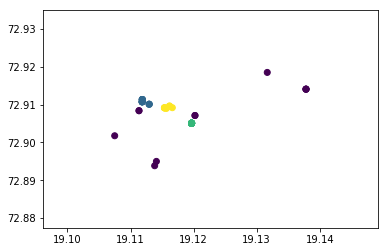

In [43]:
from sklearn.cluster import DBSCAN
import matplotlib.pylab as plt
%matplotlib inline
Xcpy = X
distance_matrix = squareform(pdist(Xcpy, (lambda u,v: haversine1(u,v))))
distance_matrix.shape

db = DBSCAN(eps=0.2, min_samples=5, metric='precomputed')  # using "precomputed" as recommended by @Anony-Mousse
y_db = db.fit_predict(distance_matrix)

print (y_db)
Xcpy['cluster'] = y_db
Xcpy

plt.scatter(Xcpy['Latitude'], Xcpy['Longitude'], c=Xcpy['cluster'])
plt.show()